In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import transform

NOVA_HOME = '/home/labs/hornsteinlab/Collaboration/NOVA_GAL/NOVA'
os.environ['NOVA_HOME'] = NOVA_HOME
sys.path.insert(1, os.getenv("NOVA_HOME"))
print(f"NOVA_HOME: {os.getenv('NOVA_HOME')}")

%reload_ext autoreload
%autoreload 2
%aimport

%matplotlib inline

NOVA_HOME: /home/labs/hornsteinlab/Collaboration/NOVA_GAL/NOVA
Modules to reload:
all-except-skipped

Modules to skip:



In [2]:
# from src.preprocessing.preprocessing_utils import get_image_focus_quality 
# from src.preprocessing.preprocessing_utils import rescale_intensity, fit_image_shape
from src.common.utils import load_config_file, get_class
from src.preprocessing.preprocessors.preprocessor_base import Preprocessor
from src.preprocessing.preprocessing_config import PreprocessingConfig
from src.preprocessing.preprocessing_utils import is_tile_focused,crop_image_to_tiles

In [3]:
run_config: PreprocessingConfig = load_config_file('./src/preprocessing/preprocessing_config_funova/PreprocessingBaseConfigFUNOVAExp3', 
                                                   '_preprocessing')

2025-03-06 15:23:04 INFO: [PreprocessingBaseConfigFUNOVAExp3] Init (log path: /home/labs/hornsteinlab/Collaboration/FUNOVA/outputs/preprocessing/logs/060325_152304_171272_403150_galavir_sysdashboardsysjupyter.log; JOBID: 403150 Username: galavir) JOBNAME: sysdashboardsysjupyter
2025-03-06 15:23:04 INFO: [PreprocessingBaseConfigFUNOVAExp3] NOVA_HOME=/home/labs/hornsteinlab/Collaboration/NOVA_GAL/NOVA, NOVA_DATA_HOME=/home/labs/hornsteinlab/Collaboration/FUNOVA/input


In [4]:
preprocessor_class: Preprocessor = get_class(run_config.PREPROCESSOR_CLASS_PATH)

In [5]:
preprocessor: Preprocessor = preprocessor_class(run_config)

2025-03-06 15:23:04 INFO: TORCH CUDA version not installed/working.
2025-03-06 15:23:04 INFO: >>>> using CPU
2025-03-06 15:23:04 INFO: >>nuclei<< model set to be used
2025-03-06 15:23:04 INFO: >>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)
2025-03-06 15:23:04 INFO: Focus boundries file for markers has been detected: /home/labs/hornsteinlab/Collaboration/NOVA_GAL/NOVA/manuscript/markers_focus_boundries/markers_focus_boundries_funova_Exp3_25.2.25.csv. Loading the file...
2025-03-06 15:23:04 INFO: Focus boundries file for markers's tiles has been detected: /home/labs/hornsteinlab/Collaboration/NOVA_GAL/NOVA/manuscript/markers_focus_boundries/markers_focus_boundries_funova_Exp3_tiles.csv. Loading the file...


In [6]:
preprocessor.markers_focus_boundries_tiles

,Lower_bound
Aberrant-splicing,2.0
Apoptosis,0.0
Autophagy,0.0
Cytoskeleton,2.6
DAPI,1.6
DNA-damage-P53BP1,2.2
DNA-damage-pH2Ax,0.0
Necroptosis-HMGB1,7.0
Necroptosis-pMLKL,0.0
Necrosis,1.7


In [7]:
input_folder, output_folder = preprocessor.preprocessing_config.INPUT_FOLDERS[0], preprocessor.preprocessing_config.PROCESSED_FOLDERS[0]

In [10]:
input_folder

'/home/labs/hornsteinlab/Collaboration/FUNOVA/input/images/raw/Batch1'

In [9]:
# Make sure to make this function not privte before running this

In [11]:
images_groups = preprocessor.get_grouped_images_for_folder(input_folder)

In [12]:
images_groups

{'/TDP--43-G348V-1057052/panelD/stress/rep1/r10c07f45': {'Autophagy': '/home/labs/hornsteinlab/Collaboration/FUNOVA/input/images/raw/Batch1/TDP--43-G348V-1057052/panelD/stress/rep1/Autophagy/r10c07f45-ch2t1.tiff',
  'DAPI': '/home/labs/hornsteinlab/Collaboration/FUNOVA/input/images/raw/Batch1/TDP--43-G348V-1057052/panelD/stress/rep1/DAPI/r10c07f45-ch1t1.tiff',
  'impaired-Autophagosome': '/home/labs/hornsteinlab/Collaboration/FUNOVA/input/images/raw/Batch1/TDP--43-G348V-1057052/panelD/stress/rep1/impaired-Autophagosome/r10c07f45-ch3t1.tiff'},
 '/TDP--43-G348V-1057052/panelD/stress/rep1/r10c07f67': {'Autophagy': '/home/labs/hornsteinlab/Collaboration/FUNOVA/input/images/raw/Batch1/TDP--43-G348V-1057052/panelD/stress/rep1/Autophagy/r10c07f67-ch2t1.tiff',
  'DAPI': '/home/labs/hornsteinlab/Collaboration/FUNOVA/input/images/raw/Batch1/TDP--43-G348V-1057052/panelD/stress/rep1/DAPI/r10c07f67-ch1t1.tiff',
  'impaired-Autophagosome': '/home/labs/hornsteinlab/Collaboration/FUNOVA/input/images/r

In [ ]:
/Control-1017118/Untreated/impaired-Autophagosome/rep1_r07c07f76-ch3t1_panelD_Control-1017118_processed.npy


In [13]:
for group_id, images_group in images_groups.items():
    print(group_id)
    processed_images = {}
    nucleus_path = images_group['DAPI']
    processed_nucleus = preprocessor._get_image(nucleus_path)
    try:
        valid_tiles_indexes, nuclei_mask_tiled  = preprocessor._get_valid_tiles_indexes(processed_nucleus)
    except:
        print('error')
    if len(valid_tiles_indexes):
        break

2025-03-06 15:23:35 WARNING: The image shape (1080, 1080) isn't as expected (1024, 1024).
Cropping image to fit
2025-03-06 15:23:35 WARNING: Removing pixels from the frame (28, 28)
2025-03-06 15:23:35 INFO: New image shape: (1024, 1024)
2025-03-06 15:23:35 INFO: ~~~ FINDING MASKS ~~~


/TDP--43-G348V-1057052/panelD/stress/rep1/r10c07f45


2025-03-06 15:23:39 INFO: >>>> TOTAL TIME 3.38 sec
2025-03-06 15:23:39 WARNING: The image shape (1080, 1080) isn't as expected (1024, 1024).
Cropping image to fit
2025-03-06 15:23:39 WARNING: Removing pixels from the frame (28, 28)
2025-03-06 15:23:39 INFO: New image shape: (1024, 1024)
2025-03-06 15:23:39 INFO: ~~~ FINDING MASKS ~~~


/TDP--43-G348V-1057052/panelD/stress/rep1/r10c07f67


2025-03-06 15:23:42 INFO: >>>> TOTAL TIME 3.18 sec
2025-03-06 15:23:42 WARNING: The image shape (1080, 1080) isn't as expected (1024, 1024).
Cropping image to fit
2025-03-06 15:23:42 WARNING: Removing pixels from the frame (28, 28)
2025-03-06 15:23:42 INFO: New image shape: (1024, 1024)
2025-03-06 15:23:42 INFO: ~~~ FINDING MASKS ~~~


/TDP--43-G348V-1057052/panelD/stress/rep1/r10c07f87


2025-03-06 15:23:45 INFO: >>>> TOTAL TIME 3.18 sec
2025-03-06 15:23:45 WARNING: The image shape (1080, 1080) isn't as expected (1024, 1024).
Cropping image to fit
2025-03-06 15:23:45 WARNING: Removing pixels from the frame (28, 28)
2025-03-06 15:23:45 INFO: New image shape: (1024, 1024)
2025-03-06 15:23:45 WARNING: Image is blurred. Expected to be in range of (176.72, 1754.27), but got 97822.34559221202
2025-03-06 15:23:45 WARNING: out-of-focus for DAPI: /home/labs/hornsteinlab/Collaboration/FUNOVA/input/images/raw/Batch1/TDP--43-G348V-1057052/panelD/stress/rep1/DAPI/r10c07f70-ch1t1.tiff
2025-03-06 15:23:45 WARNING: The image shape (1080, 1080) isn't as expected (1024, 1024).
Cropping image to fit
2025-03-06 15:23:45 WARNING: Removing pixels from the frame (28, 28)
2025-03-06 15:23:45 INFO: New image shape: (1024, 1024)
2025-03-06 15:23:45 INFO: ~~~ FINDING MASKS ~~~


/TDP--43-G348V-1057052/panelD/stress/rep1/r10c07f70
error
/TDP--43-G348V-1057052/panelD/stress/rep1/r10c07f30


2025-03-06 15:23:49 INFO: >>>> TOTAL TIME 3.71 sec


In [14]:
group_id = '/Control-1017118/panelD/Untreated/rep1/r07c07f76'
images_group = images_groups[group_id]

In [15]:
group_id, images_group

('/Control-1017118/panelD/Untreated/rep1/r07c07f76',
 {'Autophagy': '/home/labs/hornsteinlab/Collaboration/FUNOVA/input/images/raw/Batch1/Control-1017118/panelD/Untreated/rep1/Autophagy/r07c07f76-ch2t1.tiff',
  'DAPI': '/home/labs/hornsteinlab/Collaboration/FUNOVA/input/images/raw/Batch1/Control-1017118/panelD/Untreated/rep1/DAPI/r07c07f76-ch1t1.tiff',
  'impaired-Autophagosome': '/home/labs/hornsteinlab/Collaboration/FUNOVA/input/images/raw/Batch1/Control-1017118/panelD/Untreated/rep1/impaired-Autophagosome/r07c07f76-ch3t1.tiff'})

In [16]:
processed_images = {}
nucleus_path = images_group['DAPI']
processed_nucleus = preprocessor._get_image(nucleus_path)
valid_tiles_indexes, nuclei_mask_tiled  = preprocessor._get_valid_tiles_indexes(processed_nucleus)

2025-03-06 15:23:49 WARNING: The image shape (1080, 1080) isn't as expected (1024, 1024).
Cropping image to fit
2025-03-06 15:23:49 WARNING: Removing pixels from the frame (28, 28)
2025-03-06 15:23:49 INFO: New image shape: (1024, 1024)
2025-03-06 15:23:49 INFO: ~~~ FINDING MASKS ~~~
2025-03-06 15:23:54 INFO: >>>> TOTAL TIME 4.97 sec


In [17]:
nucleus_path

'/home/labs/hornsteinlab/Collaboration/FUNOVA/input/images/raw/Batch1/Control-1017118/panelD/Untreated/rep1/DAPI/r07c07f76-ch1t1.tiff'

In [18]:
np.shape(processed_nucleus)

(1024, 1024)

In [19]:
valid_tiles_indexes

array([ 0, 21, 39, 42, 46, 54, 55, 59, 61, 62])

In [20]:
preprocessor.markers_focus_boundries_tiles is not None

True

In [21]:
marker = 'DAPI'
threshold = tuple(preprocessor.markers_focus_boundries_tiles.loc[marker].values)
cropped_nucleus = crop_image_to_tiles(processed_nucleus, preprocessor.preprocessing_config.TILE_INTERMEDIATE_SHAPE)
cropped_nucleus = [transform.resize(tile, preprocessor.preprocessing_config.TILE_SHAPE, anti_aliasing=True) 
               for tile in cropped_nucleus]

# Remove indices that do not pass the focus check
valid_tiles_indexes = np.array([ind for ind in valid_tiles_indexes if is_tile_focused(cropped_nucleus[ind][:, :, 0], 
                                                                                  threshold)])
valid_tiles_indexes

53.52942015946345
47.721211049492865
16.037777007607993
7.380404207910388
27.840090656027236
10.934110397000842
21.550806985500337
23.404626887752805
5.6177152394757535
4.71507546236207


array([ 0, 21, 39, 42, 46, 54, 55, 59, 61, 62])

In [22]:
np.shape(cropped_nucleus)

(64, 100, 100, 1)

In [23]:
np.shape(cropped_nucleus[valid_tiles_indexes[6]])

(100, 100, 1)

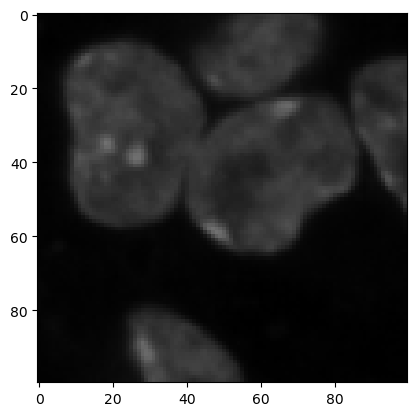

In [24]:
plt.imshow(cropped_nucleus[valid_tiles_indexes[6]], cmap='gray', vmin=0, vmax=1)

In [25]:
for marker_name, marker_path in images_group.items():
    print(marker_name)
#     if marker_name == 'DAPI':
#         break

Autophagy
DAPI
impaired-Autophagosome


In [26]:
processed_marker = preprocessor._get_image(marker_path)

2025-03-06 15:23:55 WARNING: The image shape (1080, 1080) isn't as expected (1024, 1024).
Cropping image to fit
2025-03-06 15:23:55 WARNING: Removing pixels from the frame (28, 28)
2025-03-06 15:23:55 INFO: New image shape: (1024, 1024)


In [27]:
image_pair = np.stack([processed_marker, processed_nucleus], axis=-1)

In [28]:
threshold = tuple(preprocessor.markers_focus_boundries_tiles.loc[marker_name].values)
threshold

(1.8,)

In [45]:
image_pair_tiled = crop_image_to_tiles(image_pair, preprocessor.preprocessing_config.TILE_INTERMEDIATE_SHAPE)
# image_pair_tiled = image_pair_tiled[valid_tiles_indexes]
# Resize the tile to be TILE_SHAPE
image_pair_tiled = [transform.resize(tile, preprocessor.preprocessing_config.TILE_SHAPE, anti_aliasing=True) 
                          for tile in image_pair_tiled]
image_pair_tiled = np.stack(image_pair_tiled)

In [46]:
valid_tiles_indexes

array([ 0, 21, 39, 42, 46, 54, 55, 59, 61, 62])

In [47]:
np.shape(image_pair_tiled)

(64, 100, 100, 2)

In [48]:
valid_tiles_indexes_marker = [ind for ind in valid_tiles_indexes if 
                              is_tile_focused(image_pair_tiled[ind][:, :, 0], threshold)]
valid_tiles_indexes_marker

2025-03-06 15:28:23 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 1.3014837715003462
2025-03-06 15:28:23 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 0.9040909334370336
2025-03-06 15:28:23 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 0.7951576056243959
2025-03-06 15:28:23 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 1.0715826941235245
2025-03-06 15:28:23 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 1.0936469810508997
2025-03-06 15:28:23 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 0.5216125163823719
2025-03-06 15:28:23 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 1.6403224827014247
2025-03-06 15:28:23 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 1.2199739586947245


[0, 21]

In [373]:
valid_tiles_indexes_marker = [ind for ind in valid_tiles_indexes if 
                              is_tile_focused(image_pair_valid_tiles[ind][:, :, 0], threshold)]
valid_tiles_indexes_marker

2025-03-03 14:59:16 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 1.3014837715003462
2025-03-03 14:59:16 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 0.9040909334370336
2025-03-03 14:59:16 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 0.7951576056243959
2025-03-03 14:59:16 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 1.0715826941235245
2025-03-03 14:59:16 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 1.0936469810508997
2025-03-03 14:59:16 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 0.5216125163823719
2025-03-03 14:59:16 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 1.6403224827014247
2025-03-03 14:59:16 WARNING: Tile is blurred. Expected to be higher than ((1.8,)), but got 1.2199739586947245


5.797903344236513
3.133983165510381
1.3014837715003462
0.9040909334370336
0.7951576056243959
1.0715826941235245
1.0936469810508997
0.5216125163823719
1.6403224827014247
1.2199739586947245


[0, 21]

In [34]:
np.shape(image_pair_tiled)

(64, 100, 100, 2)

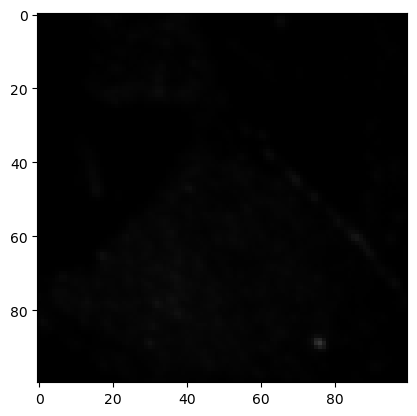

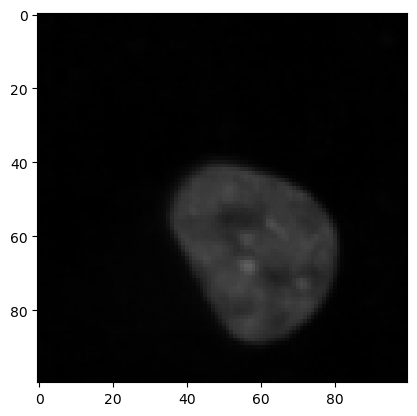

In [35]:
plt.imshow(image_pair_tiled[42][:, :, 0], cmap='gray', vmin=0, vmax=1)
plt.show()
plt.imshow(image_pair_tiled[42][:, :, 1], cmap='gray', vmin=0, vmax=1)
plt.show()


In [37]:
image_pair_valid_tiles = image_pair_tiled[valid_tiles_indexes_marker]

In [38]:
np.shape(image_pair_valid_tiles)

(2, 100, 100, 2)

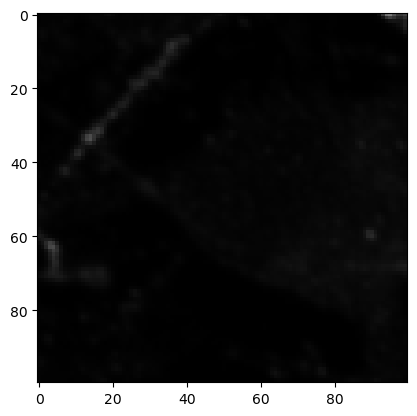

In [39]:
plt.imshow(image_pair_valid_tiles[0][:, :, 0], cmap='gray', vmin=0, vmax=1)

In [190]:
image_pair_tiled[valid_tiles_indexes_marker]

array([[[[0.00955598, 0.27505865],
         [0.01133881, 0.27810428],
         [0.01497578, 0.27772358],
         ...,
         [0.21240655, 0.0047588 ],
         [0.22891557, 0.00571056],
         [0.2793697 , 0.00609126]],

        [[0.0091281 , 0.27848499],
         [0.01112487, 0.28057886],
         [0.01255113, 0.27886569],
         ...,
         [0.140915  , 0.00552021],
         [0.15353745, 0.00571056],
         [0.21625746, 0.00742373]],

        [[0.01083962, 0.27353584],
         [0.01105356, 0.28057886],
         [0.01369215, 0.27410689],
         ...,
         [0.08732309, 0.00742373],
         [0.10294069, 0.00552021],
         [0.15617604, 0.00647197]],

        ...,

        [[0.01351386, 0.21585918],
         [0.01205194, 0.38489176],
         [0.01148143, 0.6683259 ],
         ...,
         [0.02752692, 0.00970795],
         [0.01950418, 0.01085006],
         [0.01597417, 0.00704302]],

        [[0.01412003, 0.18464145],
         [0.01105356, 0.28800259],
         [0.